#!pip install pydotplus
#!pip install pydot
#!pip install graphviz

## Predicting Sales of Walmart Products

**Team:**
* Rudraksh Mishra
* Ambika Chundru

**Course:** DAAN 897– Deep Learning (Spring II, 2022)

### Problem Statement
* The main objective is to estimate or predict the unit sales of Walmart retail goods at stores in various locations for the next 28-days, and 180 days.

    
    
    
* **Keywords:** sales price prediction, retail predection ,LSTM, CNN, DA-RNN
	

### Introduction

In the retail industry, forecasting sales accurately is important as this will help improve the revenue by avoiding can avoid wastages and shortages of products. 
Walmart shared its historical sales data on Kaggle as an M5 competition to enhance its forecasting models. 


### Data Collection
* Source(url):https://www.kaggle.com/c/m5-forecasting-accuracy/data
* Short Description : The 5 years time-series sales data set of various product over various stores was published on Kaggle for the M5 completion.


### Required packages
#!pip install pydotplus 

#!pip install pydot 

#!pip install graphviz



### Load data

In [62]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import os
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from numpy.random import seed
seed(5)
import tensorflow
tensorflow.random.set_seed(180)
#load the required files
train_sales_initial = pd.read_csv('sales_train_evaluation.csv')#stv
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')
stv= pd.read_csv('sales_train_validation.csv')
test= pd.read_csv('sales_test_evaluation.csv')

In [63]:
#initialize the CPU and GPU
import tensorflow as tf
from tensorflow.python.keras import backend as K
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [64]:
tf.test.is_built_with_cuda()

True

## Data Snippets

In [65]:
train_sales_initial.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [66]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [68]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### Vizualize Data

Lets take a random item see how it's sales look across the training data.

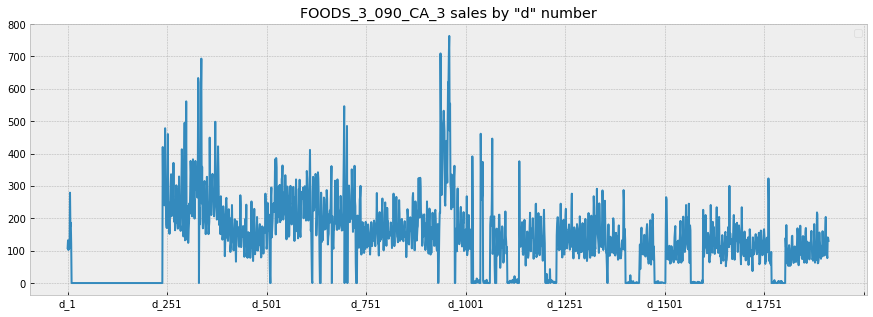

In [69]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns

stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()


Note there are days where it appears the item is unavailable so sales are flatline

### Merging the data with real dates 
This is done to view moder trends of the sales over time.

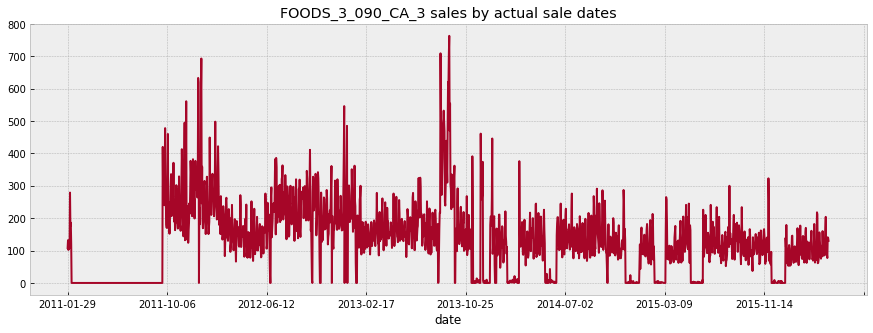

In [70]:
cal = calendar
# Merge calendar on our items' data
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) 
example = example.reset_index().rename(columns={'index': 'd'})
example = example.merge(cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

# Select more top selling examples
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) 
example2 = example2.reset_index().rename(columns={'index': 'd'}) 
example2 = example2.merge(cal, how='left', validate='1:1')

example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) 
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

### Sales broken down by time variables

Now that we have our example item lets see how it sells by:
1) Day of the week

2) Month

3) Year

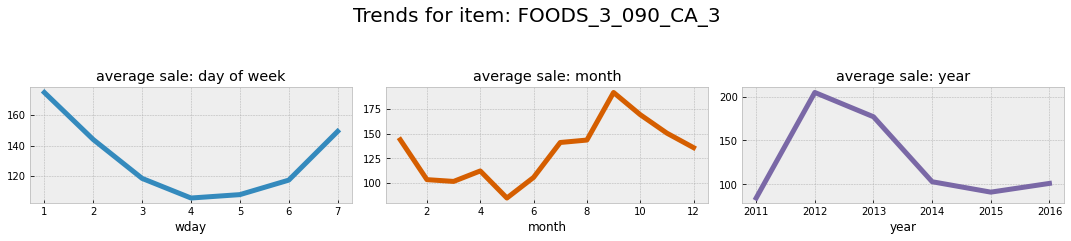

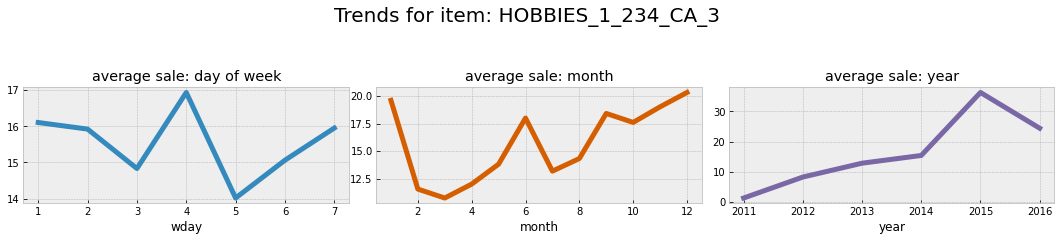

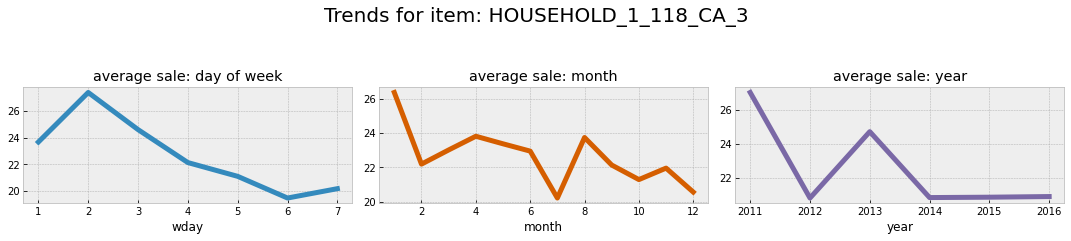

In [71]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

### Sales of diffrent items over dates

In [72]:
six_examples = stv.sample(10, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

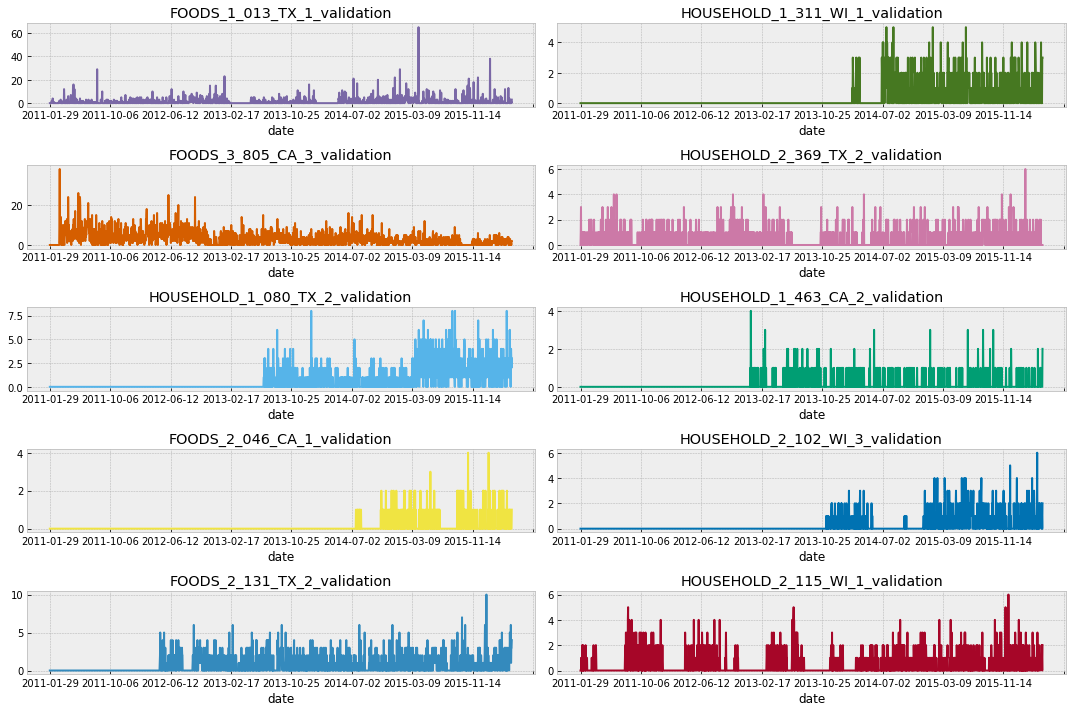

In [73]:
fig, axs = plt.subplots(5, 2, figsize=(15, 10))
axs = axs.flatten()
ax_idx = 0
for item in six_examples.columns:
    six_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

### Combined Sales over Time by Type

We have several item types:

1) Hobbies

2) Household

3) Foods

In [74]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

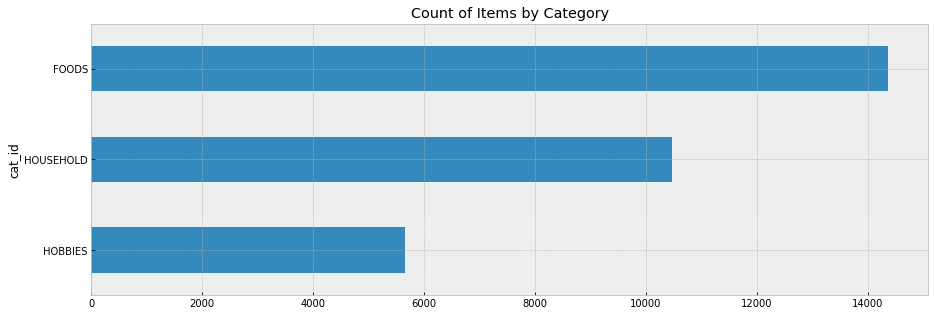

In [75]:
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

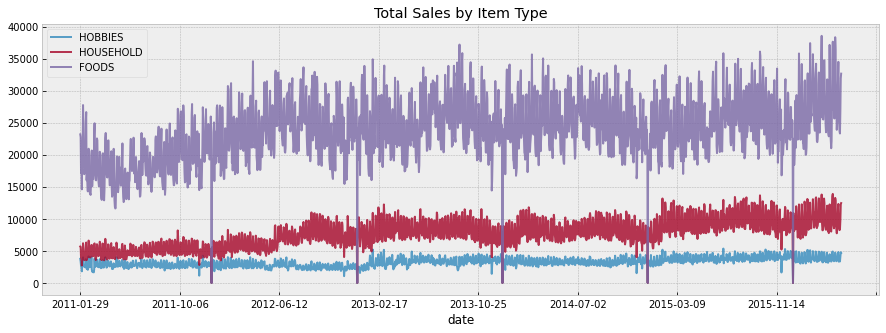

In [76]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

## Data Preporcessing

## Downcasting
Downcasting the dataframes helps to reduce the amount of storage used by them and also to expidite the operations performed on them.

In [77]:
#To reduce memory usage we will downcast our data set
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df
#Reduce memory usage and compare with the previous one to be sure
train_sales_downcast = downcast_dtypes(train_sales_initial)

In [78]:
train_sales_downcast.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0



### Preprocess dataset

There are several goods with zero pricing from day 1 to day 350, according to the sale price dataset. This is owing to the fact that the product has not yet been added to the store. Additionally, there are several goods with 0 sales in the sales train dataset, which might be owing to zero pricing or the fact that the sales were not recorded.
We need to establish a cutoff data instead of cutting the dataset by the first non-zero prices since our LSTM model predicts future sales of numerous items rather than individual products. As a result, we chose day 350 as the cutoff date.

In [79]:
# Preprocess: remove id, item_id, dept_id, cat_id, store_id, state_id columns
startDay = 350  # Remove the first 350 days in train sales
train_sales_transposed = train_sales_initial.T
train_sales_final = train_sales_transposed[6 + startDay:]


In [80]:
train_sales_final.shape

(1591, 30490)

In [81]:
train_sales_final.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1937,0,0,0,1,0,0,1,5,0,1,0,1,0,2,0,5,0,0,7,0,3,0,1,0,1,...,2,8,0,0,1,0,2,1,21,1,0,7,0,0,0,3,6,3,0,0,1,0,1,0,0
d_1938,3,0,2,3,0,0,0,4,0,1,0,1,0,1,0,0,1,0,5,0,2,0,2,0,0,...,1,5,1,1,0,0,2,0,22,0,0,2,0,0,0,1,4,3,1,2,0,1,0,1,2
d_1939,3,0,3,0,2,5,1,1,0,0,0,0,0,1,4,7,1,1,5,0,0,0,1,0,1,...,0,8,0,0,0,0,3,0,27,2,0,3,0,0,0,3,4,3,1,1,0,0,1,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,0,1,1,1,5,12,2,1,14,0,0,0,0,2,0,...,1,15,2,0,1,0,5,0,27,2,2,1,0,0,0,0,1,0,0,3,1,1,0,1,5
d_1941,1,0,1,6,0,0,0,32,0,1,0,0,1,3,4,6,0,0,11,0,0,1,2,0,0,...,1,16,0,1,1,0,1,0,31,3,1,0,0,0,1,0,1,1,4,4,1,0,2,0,1


### Additional features: event 1, event 2 and SNAP

Apart from utilizing sales as a time series element, festive or sporting events can have a big impact on sales. A day before Thanksgiving or the Superbowl, for example, buyers are more inclined to buy additional snacks or meals. Similarly, with the SNAP program, we anticipate more sales during the day. As a result, we added five new features: event 1, event 2, SNAP CA, SNAP WI, and SNAP TX. Because each shop location's SNAP program days are different, we require three distinct SNAP features.

In [82]:
# Initialize a dataframe with zeros for 1969 days in the calendar

daysBeforeEvent1 = pd.DataFrame(np.zeros((1969,1)))
daysBeforeEvent2 = pd.DataFrame(np.zeros((1969,1)))

snap_CA = pd.DataFrame(np.zeros((1969,1)))
snap_TX = pd.DataFrame(np.zeros((1969,1)))
snap_WI = pd.DataFrame(np.zeros((1969,1)))

for x,y in calendar.iterrows():
    if((pd.isnull(calendar["event_name_1"][x])) == False):
           daysBeforeEvent1[0][x-1] = 1 
            
    if((pd.isnull(calendar["event_name_2"][x])) == False):
           daysBeforeEvent2[0][x-1] = 1    
    
    
    if((pd.isnull(calendar["snap_CA"][x])) == False):
           snap_CA[0][x] = 1    
        
    if((pd.isnull(calendar["snap_TX"][x])) == False):
           snap_TX[0][x] = 1    
        
    if((pd.isnull(calendar["snap_WI"][x])) == False):
           snap_WI[0][x] = 1

### Creating training, validation, evaluation dataset

In [83]:
# split dataset into evaluation (last 2 weeks), validation (first 2 weeks), training  
# input for predicting validation period day 1941 to 1969


daysBeforeEvent1_eval = daysBeforeEvent1[1941:]
daysBeforeEvent2_eval = daysBeforeEvent2[1941:]

snap_CA_eval = snap_CA[1941:]
snap_TX_eval = snap_TX[1941:]
snap_WI_eval = snap_WI[1941:]


# input for predicting validation period day 1913 to 1941

train_sales_valid = train_sales_transposed[1800:1941]

daysBeforeEvent1_valid = daysBeforeEvent1[1800:1941] 
daysBeforeEvent2_valid = daysBeforeEvent2[1800:1941]

snap_CA_valid = snap_CA[1800:1941] 
snap_TX_valid = snap_TX[1800:1941]
snap_WI_valid = snap_WI[1800:1941]

# input for training as a feature

train_sales = train_sales_final[:1800]

daysBeforeEvent1_train = daysBeforeEvent1[startDay:1941] 
daysBeforeEvent2_train = daysBeforeEvent2[startDay:1941]

snap_CA_train = snap_CA[startDay:1941] 
snap_TX_train = snap_TX[startDay:1941] 
snap_WI_train = snap_WI[startDay:1941] 

In [84]:
train_sales.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1937,0,0,0,1,0,0,1,5,0,1,0,1,0,2,0,5,0,0,7,0,3,0,1,0,1,...,2,8,0,0,1,0,2,1,21,1,0,7,0,0,0,3,6,3,0,0,1,0,1,0,0
d_1938,3,0,2,3,0,0,0,4,0,1,0,1,0,1,0,0,1,0,5,0,2,0,2,0,0,...,1,5,1,1,0,0,2,0,22,0,0,2,0,0,0,1,4,3,1,2,0,1,0,1,2
d_1939,3,0,3,0,2,5,1,1,0,0,0,0,0,1,4,7,1,1,5,0,0,0,1,0,1,...,0,8,0,0,0,0,3,0,27,2,0,3,0,0,0,3,4,3,1,1,0,0,1,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,0,1,1,1,5,12,2,1,14,0,0,0,0,2,0,...,1,15,2,0,1,0,5,0,27,2,2,1,0,0,0,0,1,0,0,3,1,1,0,1,5
d_1941,1,0,1,6,0,0,0,32,0,1,0,0,1,3,4,6,0,0,11,0,0,1,2,0,0,...,1,16,0,1,1,0,1,0,31,3,1,0,0,0,1,0,1,1,4,4,1,0,2,0,1


In [85]:
daysBeforeEvent1_valid.head()

,0
1800,0.0
1801,0.0
1802,0.0
1803,1.0
1804,0.0


In [86]:
## Check the indexes for training data
daysBeforeEvent1_train.columns = ["oneDayBeforeEvent1"]
daysBeforeEvent1_train.index = train_sales.index

daysBeforeEvent2_train.columns = ["oneDayBeforeEvent2"]
daysBeforeEvent2_train.index = train_sales.index


snap_CA_train.columns = ["snap_CA"]
snap_CA_train.index = train_sales.index

snap_TX_train.columns = ["snap_TX"]
snap_TX_train.index = train_sales.index

snap_WI_train.columns = ["snap_WI"]
snap_WI_train.index = train_sales.index


In [87]:
## Check the indexes for validation data
daysBeforeEvent1_valid.columns = ["oneDayBeforeEvent1"]
daysBeforeEvent1_valid.index = train_sales_valid.index

daysBeforeEvent2_valid.columns = ["oneDayBeforeEvent2"]
daysBeforeEvent2_valid.index = train_sales_valid.index

snap_CA_valid.columns = ["snap_CA"]
snap_CA_valid.index = train_sales_valid.index

snap_TX_valid.columns = ["snap_TX"]
snap_TX_valid.index = train_sales_valid.index


snap_WI_valid.columns = ["snap_WI"]
snap_WI_valid.index = train_sales_valid.index

In [88]:
#concat all the validation data
train_sales_valid = pd.concat([train_sales_valid, daysBeforeEvent1_valid, daysBeforeEvent2_valid,
                        snap_CA_valid, snap_TX_valid, snap_WI_valid], axis = 1, sort=False)


In [89]:
#concat all the training data
train_sales_concat = pd.concat([train_sales, daysBeforeEvent1_train, daysBeforeEvent2_train,
                        snap_CA_train, snap_TX_train, snap_WI_train], axis = 1, sort=False)

In [90]:
train_sales_concat.shape

(1591, 30495)

### Standardizing features

It's also crucial that our features be scaled throughout the columns. Each column reflects a single day's worth of sales. This ensures that the sales values are between 0 and 1, which aids the LSTM model's gradient descent optimization procedure.

In [91]:
train_sales_valid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent1,oneDayBeforeEvent2,snap_CA,snap_TX,snap_WI
d_1795,0,0,1,0,0,0,0,7,0,0,0,0,0,0,0,6,0,0,5,0,1,0,0,0,0,...,0,0,0,11,0,0,1,0,11,0,1,2,0,0,3,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0
d_1796,2,0,3,0,0,0,0,2,0,2,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,14,1,0,1,0,9,0,1,0,0,2,3,0,0,1,0,0,0.0,0.0,1.0,1.0,1.0
d_1797,2,0,0,1,1,0,0,9,0,0,0,0,0,1,0,11,1,0,29,1,1,0,0,0,0,...,0,0,0,21,0,0,6,2,8,0,5,5,3,2,1,2,0,2,0,0,0.0,0.0,1.0,1.0,1.0
d_1798,1,0,1,5,0,0,0,7,0,0,0,1,0,4,8,15,1,0,0,1,0,0,0,0,0,...,0,5,0,33,0,0,4,0,10,2,2,2,2,2,3,1,0,1,0,0,1.0,0.0,1.0,1.0,1.0
d_1799,0,0,1,3,0,0,1,7,0,1,0,0,1,7,4,21,0,1,0,0,0,1,0,0,0,...,0,2,0,11,1,1,3,0,15,0,1,0,0,1,1,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1931,0,0,0,1,2,5,0,47,0,1,0,0,1,2,0,0,0,0,3,0,1,0,1,0,0,...,0,6,0,24,1,1,1,0,14,1,3,1,1,2,2,0,0,1,1,0,0.0,0.0,1.0,1.0,1.0
d_1932,2,0,1,1,0,2,0,7,1,0,0,0,1,1,9,13,1,0,21,0,0,0,1,0,0,...,0,1,0,22,0,0,5,0,0,1,4,2,4,2,1,1,0,0,1,1,0.0,0.0,1.0,1.0,1.0
d_1933,4,1,0,1,0,1,1,0,0,0,0,1,1,1,15,6,3,0,4,0,1,0,2,1,0,...,0,3,1,42,2,0,1,0,1,0,4,1,0,2,2,0,0,0,1,2,0.0,0.0,1.0,1.0,1.0
d_1934,0,2,2,0,0,0,0,6,0,1,0,0,1,1,0,0,1,0,17,0,2,0,1,0,2,...,0,4,5,21,1,2,0,0,0,0,3,2,5,0,5,3,0,1,1,0,0.0,0.0,1.0,1.0,1.0


In [92]:
#Scale features using min-max scaler in range 0-1
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

train_sales_scaled = sc.fit_transform(train_sales_concat)
train_sales_valid_scaled = sc.fit_transform(train_sales_valid)

In [93]:
np.shape(train_sales_scaled),np.shape(train_sales_valid_scaled)

((1591, 30495), (141, 30495))

In [36]:
timesteps = 28  # use the last 28 days to predict the next day's sales
X_train = []
y_train = []

for i in range(timesteps, 1800 - startDay):
    X_train.append(train_sales_scaled[i-timesteps:i])
    y_train.append(train_sales_scaled[i+7][0:30490])

In [38]:
X_vald = []
y_vald = []

for i in range(timesteps+1423, 1941 - startDay-7):
    X_vald.append(train_sales_scaled[i-timesteps:i])
    y_vald.append(train_sales_scaled[i+7][0:30490])

In [39]:
numpy.shape(X_vald)

(133, 28, 30495)

In [40]:
#Convert to np array to be able to feed the LSTM model
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1422, 28, 30495)
(1422, 30490)


In [41]:
#Convert to np array to be able to feed the LSTM model
X_vald = np.array(X_vald)
y_vald = np.array(y_vald)
print(X_vald.shape)
print(y_vald.shape)

(133, 28, 30495)
(133, 30490)


## Preparing the last 30 days for testing

In [42]:
test_f=test.iloc[:, 5:]
test2=test_f.T
df_added=pd.concat([train_sales_final,test2])
df_added

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_351,0,0,0,2,0,0,0,24,3,2,0,1,0,4,17,0,4,0,0,0,0,0,0,0,1,...,0,10,2,0,9,2,9,0,0,7,0,6,0,0,0,0,9,1,0,11,0,0,1,0,0
d_352,0,0,0,0,0,0,0,9,0,2,0,0,0,2,0,0,3,0,0,0,0,1,2,0,0,...,0,6,5,0,8,7,12,0,0,0,0,3,0,0,1,0,5,4,0,8,0,1,2,0,0
d_353,0,0,0,4,2,0,0,2,1,1,0,1,0,0,10,0,0,0,0,0,0,1,2,0,0,...,0,10,4,0,11,9,7,0,0,1,0,16,0,0,2,0,15,2,0,3,0,1,2,0,0
d_354,0,1,0,2,0,0,0,7,1,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,...,0,4,1,0,3,2,2,0,0,1,0,9,0,0,0,0,5,1,0,3,0,0,0,0,0
d_355,0,0,0,1,2,0,0,0,0,0,0,0,0,0,6,0,2,0,0,0,0,1,0,0,0,...,0,8,7,0,8,20,2,0,0,3,0,2,0,0,1,0,7,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1965,1,0,2,6,0,0,0,19,0,1,0,0,0,2,4,4,1,0,0,0,0,0,0,0,0,...,0,9,0,0,4,69,1,0,10,0,0,1,0,0,0,1,1,2,1,2,1,1,1,3,1
d_1966,0,2,1,3,0,3,0,8,0,1,0,0,0,2,2,4,1,0,1,1,0,1,0,0,1,...,2,7,0,0,7,12,0,0,8,0,0,0,0,0,0,1,3,1,0,1,1,0,1,0,7
d_1967,1,1,0,1,0,0,1,4,0,0,0,0,0,0,0,4,0,0,2,0,0,0,0,0,0,...,0,2,1,0,2,27,1,0,24,0,0,0,0,0,0,3,2,2,0,3,1,0,1,2,2
d_1968,3,1,1,4,0,1,1,14,0,0,0,0,0,0,0,27,1,0,12,0,0,0,1,0,0,...,1,32,7,0,1,24,4,0,12,0,1,1,0,0,0,1,1,5,2,5,1,0,1,1,1


In [43]:
dbt=daysBeforeEvent1[350:]
dbt2=daysBeforeEvent2[350:]
snap_CA_t = snap_CA[350:]
snap_TX_t = snap_TX[350:]
snap_WI_t = snap_WI[350:]
dbt.columns = ["oneDayBeforeEvent1"]
dbt2.columns = ["oneDayBeforeEvent2"]
snap_CA_t.columns = ["snap_CA"]
snap_TX_t.columns = ["snap_TX"]
snap_WI_t.columns = ["snap_WI"]
dbt.index = df_added.index
dbt2.index = df_added.index
snap_CA_t.index = df_added.index
snap_TX_t.index = df_added.index
snap_WI_t.index = df_added.index

In [44]:
# Concat the data
df_final= pd.concat([df_added, dbt, dbt2,
                        snap_CA_t, snap_TX_t, snap_WI_t], axis = 1, sort=False)

In [45]:
X_test=[]
y_test=[]
for i in range(1935-350, 1962-350):
    X_test.append(df_final.iloc[i-28:i,:])
    y_test.append(df_final.iloc[i+7,0:30490])

In [46]:
np.shape(y_test), np.shape(X_test)

((27, 30490), (27, 28, 30495))

In [47]:
#assign typer
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Methodology

### CNN-LSTM Model

CNN has the characteristic of paying attention to the most obvious features in the line of sight, so it is widely used in feature engineering. LSTM has the characteristic of expanding according to the sequence of time, and it is widely used in time series. According to the characteristics of CNN and LSTM, our timer series forecasting is done

They constitute the appropriate methodology to deal with the noisy and chaotic nature of time-series forecasting problem and lead to more accurate predictions. Long short-term memory (LSTM) networks and convolutional neural networks (CNNs) are probably the most popular, efficient and widely used deep learning techniques

CNN-LSTM was utilized, using batch normalization as a regularization option. CNN is divided into two sections (conv1d followed by max pooling layer). The conv1d layer aids in the analysis and extraction of sales patterns over a one-week period (just like extracting "edges" patterns in a typcial conv2d on an image). The max pooling layer then aggregates these patterns into wider, generalizable patterns, removing noise from daily sales spikes and troughs.

The outputs from CNN are then input into a three-layer bidirectional LSTM model. The number of LSTM units is flipped from 512 to 256 to 128. This has the feature of simplifying and summarizing sales trends, allowing for more accurate forecasting. By minimizing the chance of overfitting, batch normalization improves the model's resilience.

In [49]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from keras.utils.vis_utils import plot_model

tf.random.set_seed(51)
np.random.seed(51)

n_timesteps = X_train.shape[1]
n_products = X_train.shape[2]
#build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=7,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=(n_timesteps, n_products)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, 
                           strides=1, activation='relu', padding="causal"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30490)
])


opt_adam = tf.keras.optimizers.Adam(clipvalue=0.5)

model.compile(loss='mse',
              optimizer=opt_adam, 
              metrics=['mse', 'mae', 'mape'])
model.summary() # model summary


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 128)           27323648  
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 64)            57408     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 7, 1024)           2363392   
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 1024)           4096      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 7, 512)            2

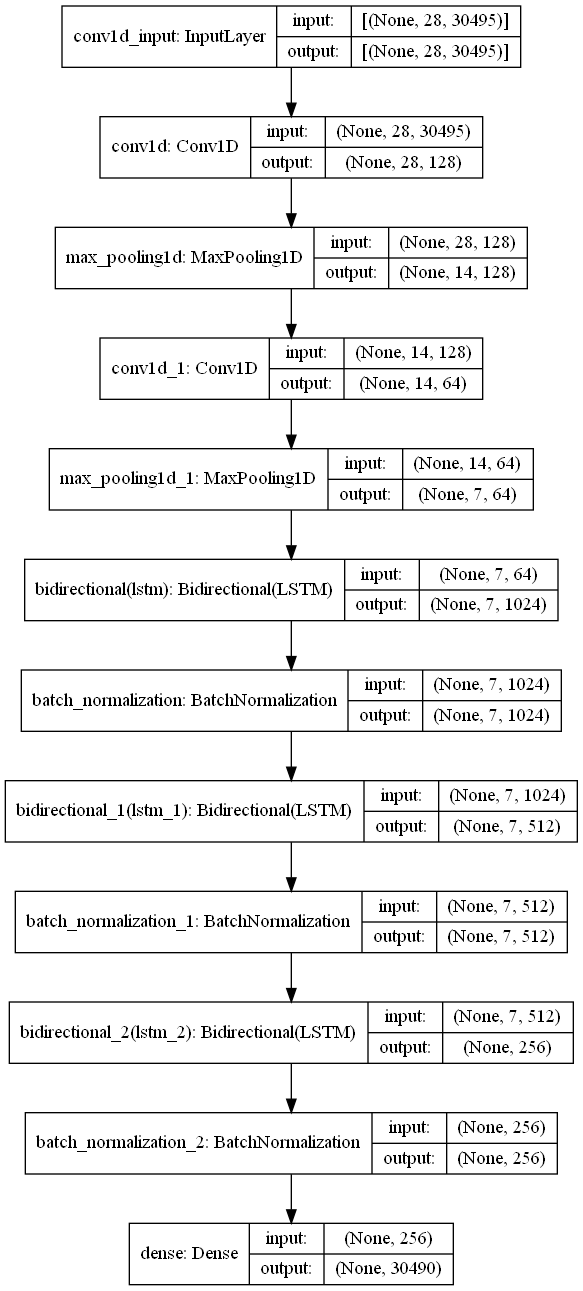

In [50]:
#model plot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Callbacks

After 300 epochs, callbacks are added to track the model's performance. If the model's performance deteriorates, it is turned off.

In [51]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min',min_delta=0.0001, verbose=1, restore_best_weights=True,patience=30)

In [52]:
# Fitting the model to the Training set
epochs = 300
batch_size = 64
history=model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,validation_data=(X_vald, y_vald),callbacks=[es] )

Epoch 1/300
23/23 [==============================] - 88s 3s/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1033 - mape: 35603456.0000 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.0994 - val_mape: 14351107.0000
Epoch 2/300
23/23 [==============================] - 70s 3s/step - loss: 0.0191 - mse: 0.0191 - mae: 0.0838 - mape: 25581124.0000 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.0970 - val_mape: 24033938.0000
Epoch 3/300
23/23 [==============================] - 64s 3s/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0799 - mape: 31697282.0000 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.0982 - val_mape: 37576412.0000
Epoch 4/300
23/23 [==============================] - 64s 3s/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0797 - mape: 37581980.0000 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.0982 - val_mape: 37930816.0000
Epoch 5/300
23/23 [==============================] - 64s 3s/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0784 - mape: 36342264.0000 - val_loss: 0.0212 - val_m

Epoch 40/300
23/23 [==============================] - 64s 3s/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0694 - mape: 31387342.0000 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0957 - val_mape: 36684528.0000
Epoch 41/300
23/23 [==============================] - 64s 3s/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0691 - mape: 31084054.0000 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0968 - val_mape: 39463128.0000
Epoch 42/300
23/23 [==============================] - 64s 3s/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0691 - mape: 31301932.0000 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.0954 - val_mape: 36485364.0000
Epoch 43/300
23/23 [==============================] - 66s 3s/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0687 - mape: 30982604.0000 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0964 - val_mape: 38718216.0000
Epoch 44/300
23/23 [==============================] - 66s 3s/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0686 - mape: 31003316.0000 - val_loss: 0.0201 - 

In [53]:
#save the model weights
model.save_weights("version3.h5")

In [54]:
#evaluate the model
results=model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 346ms/step - loss: 16.8334 - mse: 16.8334 - mae: 1.4426 - mape: 43169004.0000


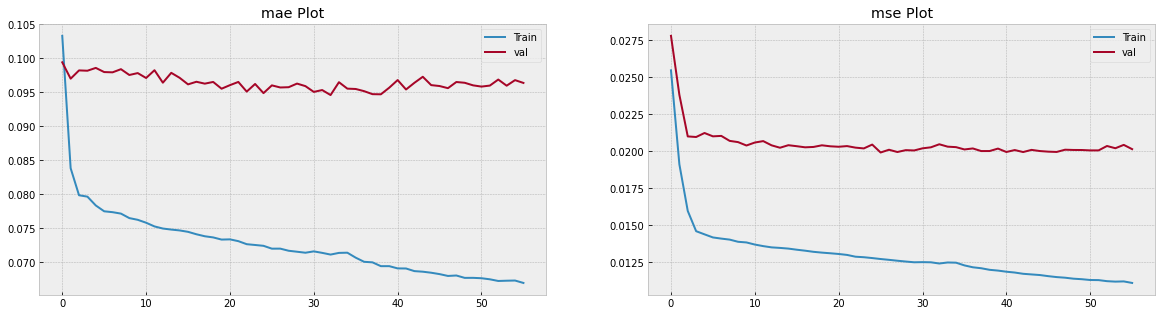

In [55]:
#plot the model metrics
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 5))
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax2.plot(history.history['mse'])
ax2.plot(history.history['val_mse'])
ax1.legend(['Train', 'val'], loc='upper right')
ax2.legend(['Train', 'val'], loc='upper right')
ax1.title.set_text('mae Plot')
ax2.title.set_text('mse Plot')
plt.show()

The validation loss has decreased and converged over time, and we can observe it in the above MSE and MAE graphs

## Predicting the future sales for evaluation periods

In [437]:
import warnings
warnings.filterwarnings('ignore')
xtr=[]
for i in range(1914-350,1942-350):
    xtr.append(sc.transform(train_sales_concat.iloc[i-28-7:i-7]))
xtr=np.array(xtr).astype(np.float32)
np.shape(xtr)

(28, 28, 30495)

In [ ]:
#### predicting the sales of next 28 days form 30490
preddd=[]
for i in range(0,28):
    pre= model.predict(xtr[i].reshape(1,28,30495))
    testInput = np.column_stack((np.array(pre),
                                 daysBeforeEvent1.iloc[1913 + i],
                                 daysBeforeEvent2.iloc[1913 + i],
                                 snap_CA.iloc[1913 + i],
                                snap_TX.iloc[1913 + i],
                                snap_WI.iloc[1913 + i]))
    predd=sc.inverse_transform(testInput)[:,0:30490]
    preddd.append(predd)
np.shape(preddd)

In [440]:
submission_eval = pd.DataFrame(data=np.array(preddd).reshape(28,30490))
submission_eval

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
0,0.669597,0.178931,0.241631,0.954702,0.402520,0.299981,0.201302,7.404651,0.225226,0.504958,0.005839,0.072834,0.115380,1.368026,0.722745,3.333795,0.665897,0.059332,6.635589,0.305137,0.746319,0.182784,0.670232,0.173400,0.514589,...,0.551940,1.595987,1.692720,0.084751,0.895184,1.300539,0.338068,0.601841,7.121151,0.786743,0.030536,2.876865,0.037972,7.492149,0.027393,1.064966,0.484680,1.594326,1.022504,0.374043,0.445308,0.065985,0.506333,0.420854,1.117175
1,0.625817,0.172871,0.221592,0.768307,0.405725,0.342802,0.181322,7.636628,0.252122,0.479074,0.009763,0.065440,0.112156,1.373577,0.570923,3.236504,0.662641,0.057837,6.838596,0.299525,0.694510,0.151865,0.620272,0.174187,0.491640,...,0.484560,1.605233,1.563633,0.103865,0.942682,0.909283,0.292194,0.613502,6.782141,0.720385,0.030975,2.782730,0.032843,6.835806,0.041433,1.053474,0.488331,1.578976,0.948294,0.364429,0.382916,0.056382,0.482134,0.428687,0.925540
2,0.619184,0.179432,0.242824,0.738078,0.426226,0.416623,0.181940,7.809961,0.292072,0.493356,0.009431,0.065224,0.110948,1.415112,0.550327,2.950318,0.687898,0.062238,7.129370,0.283850,0.730343,0.185923,0.656901,0.179227,0.517242,...,0.480160,1.745351,1.631933,0.099745,1.044648,0.693179,0.324411,0.609007,7.043962,0.811727,0.022412,2.864381,0.039114,7.032161,0.040022,1.066711,0.504004,1.705144,1.012222,0.425117,0.357674,0.053788,0.479637,0.468861,0.853016
3,0.751650,0.219122,0.360061,1.223257,0.439864,0.371683,0.237477,7.973921,0.306570,0.518674,0.021831,0.104804,0.123059,1.660994,0.876033,2.943096,0.793299,0.067045,7.180183,0.308187,0.898399,0.293701,0.808558,0.160293,0.657846,...,0.568758,2.547799,2.410446,0.091458,1.387007,0.830453,0.361485,0.709383,8.566250,1.057694,-0.010577,3.345968,0.053109,8.747114,0.022998,1.238864,0.598477,2.038473,1.411075,0.645843,0.549495,0.078375,0.549737,0.464167,1.244982
4,0.822193,0.236257,0.467672,1.780253,0.525988,0.324719,0.302477,8.117940,0.325916,0.575007,0.049866,0.136343,0.173154,1.865465,0.910378,3.527753,0.797170,0.058952,7.051442,0.365554,1.048637,0.323507,0.922451,0.137201,0.823343,...,0.680717,2.624533,2.729236,0.150334,1.604799,1.579509,0.410068,0.757562,9.272753,1.252448,-0.001941,3.869527,0.062978,9.781984,0.010850,1.382350,0.533210,2.046116,1.566430,0.763026,0.743700,0.095161,0.587065,0.645759,1.456197
5,0.825869,0.214394,0.439117,1.852173,0.551337,0.338041,0.296093,7.838044,0.283490,0.628973,0.044811,0.137267,0.187798,1.839386,0.841184,3.953355,0.781758,0.053818,7.014074,0.369050,1.062149,0.293833,0.917899,0.142892,0.780692,...,0.775863,2.214981,2.529403,0.168137,1.629652,1.861853,0.404757,0.697659,9.016629,1.187412,0.019089,3.894452,0.072900,9.981533,0.013542,1.389647,0.521211,1.887469,1.512649,0.673803,0.761766,0.104416,0.605150,0.627127,1.455280
6,0.736217,0.178152,0.274515,1.239074,0.470216,0.396756,0.228168,8.029703,0.263829,0.577824,0.001271,0.103734,0.144744,1.477394,0.744475,3.508126,0.710841,0.049985,6.916408,0.325668,0.857856,0.220846,0.748632,0.171336,0.563605,...,0.685541,1.878873,2.209966,0.107332,1.299274,1.436126,0.323391,0.625766,7.992781,0.962935,0.025266,3.401101,0.063448,9.617913,0.017572,1.223129,0.568726,1.732674,1.191904,0.493885,0.634859,0.090464,0.586146,0.434875,1.211807
7,0.687453,0.161672,0.204042,0.907525,0.425177,0.431604,0.211340,7.956684,0.269924,0.544926,-0.000473,0.089703,0.119001,1.355005,0.620635,3.373498,0.693033,0.046531,7.032170,0.316832,0.729368,0.171638,0.666984,0.181441,0.472282,...,0.577353,1.761028,2.064270,0.106167,1.184575,1.171639,0.259169,0.629919,7.607168,0.906652,0.031746,3.203047,0.058175,9.301639,0.031510,1.149588,0.595613,1.648758,1.043873,0.488360,0.559861,0.087240,0.579066,0.383927,1.068184
8,0.633212,0.156615,0.189127,0.816879,0.411817,0.420255,0.195868,8.018542,0.316395,0.513390,-0.002331,0.089027,0.119909,1.444058,

In [441]:
x=np.array(train_sales_concat.T)
y = np.array(submission_eval.T)

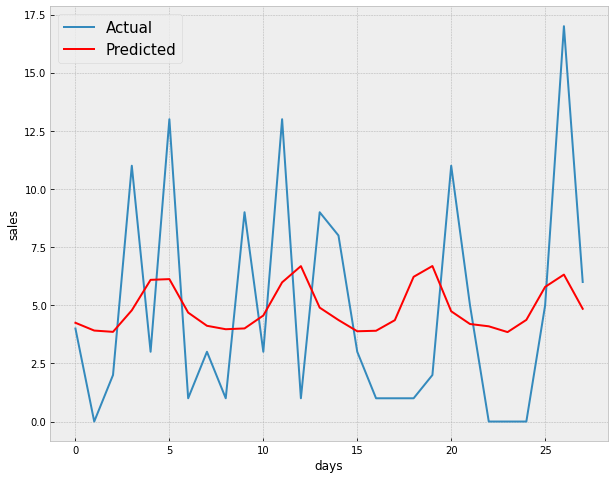

In [460]:
#Ploting the actual and predicted sales of 29th product
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel('days')
plt.ylabel('sales')
ax.plot(x[29,-28:], label="Actual")
ax.plot(y[29],color='red',label="Predicted")
leg = ax.legend(prop={'size': 15});

## PRED

In [391]:
xtr=[]
for i in range(1760-350,1942-350):
    xtr.append(train_sales_concat.iloc[i-28-7:i-7])
xtr=np.array(xtr).astype(np.float32)
np.shape(xtr)

(182, 28, 30495)

In [392]:
#### predicting the sales of next 152 days form 30490
predd=[]
for i in range(0,182):
    pre= model.predict(xtr[i].reshape(1,28,30495))
    testInput = np.column_stack((np.array(pre),
                                 daysBeforeEvent1.iloc[1760 + i],
                                 daysBeforeEvent2.iloc[1760 + i],
                                 snap_CA.iloc[1760 + i],
                                snap_TX.iloc[1760 + i],
                                snap_WI.iloc[1760 + i]))
    testInput=sc.inverse_transform(testInput)[:,0:30490]
    predd.append(testInput)
np.shape(predd)

(182, 1, 30490)

In [393]:
import numpy
submission_eval = pd.DataFrame(data=np.array(predd).reshape(182,30490))
x=numpy.array(train_sales_concat.T)
y = np.array(submission_eval.T)

In [394]:
submission_eval.T.iloc[7,:]

0       0.777600
1       3.143868
2       4.836673
3       4.506372
4       1.488028
         ...    
177     8.723778
178     7.801422
179    10.079626
180     7.277367
181     9.555573
Name: 7, Length: 182, dtype: float64

In [395]:
train_sales_concat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent1,oneDayBeforeEvent2,snap_CA,snap_TX,snap_WI
d_351,0,0,0,2,0,0,0,24,3,2,0,1,0,4,17,0,4,0,0,0,0,0,0,0,1,...,2,9,0,0,7,0,6,0,0,0,0,9,1,0,11,0,0,1,0,0,0.0,0.0,1.0,1.0,1.0
d_352,0,0,0,0,0,0,0,9,0,2,0,0,0,2,0,0,3,0,0,0,0,1,2,0,0,...,7,12,0,0,0,0,3,0,0,1,0,5,4,0,8,0,1,2,0,0,1.0,0.0,1.0,1.0,1.0
d_353,0,0,0,4,2,0,0,2,1,1,0,1,0,0,10,0,0,0,0,0,0,1,2,0,0,...,9,7,0,0,1,0,16,0,0,2,0,15,2,0,3,0,1,2,0,0,0.0,0.0,1.0,1.0,1.0
d_354,0,1,0,2,0,0,0,7,1,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,...,2,2,0,0,1,0,9,0,0,0,0,5,1,0,3,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0
d_355,0,0,0,1,2,0,0,0,0,0,0,0,0,0,6,0,2,0,0,0,0,1,0,0,0,...,20,2,0,0,3,0,2,0,0,1,0,7,1,0,1,0,1,1,0,0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,0,1,0,2,0,5,0,0,7,0,3,0,1,0,1,...,0,2,1,21,1,0,7,0,0,0,3,6,3,0,0,1,0,1,0,0,0.0,0.0,1.0,1.0,1.0
d_1938,3,0,2,3,0,0,0,4,0,1,0,1,0,1,0,0,1,0,5,0,2,0,2,0,0,...,0,2,0,22,0,0,2,0,0,0,1,4,3,1,2,0,1,0,1,2,0.0,0.0,1.0,1.0,1.0
d_1939,3,0,3,0,2,5,1,1,0,0,0,0,0,1,4,7,1,1,5,0,0,0,1,0,1,...,0,3,0,27,2,0,3,0,0,0,3,4,3,1,1,0,0,1,1,2,0.0,0.0,1.0,1.0,1.0
d_1940,0,0,0,2,1,2,1,40,1,0,0,1,1,1,5,12,2,1,14,0,0,0,0,2,0,...,0,5,0,27,2,2,1,0,0,0,0,1,0,0,3,1,1,0,1,5,0.0,0.0,1.0,1.0,1.0


In [396]:
copy_concat=train_sales_concat.copy()
copy_concat.reset_index(inplace=True)
copy_concat=copy_concat.iloc[: , 1:]
copy_concat=copy_concat.T.iloc[:,1760-350:1941-350]
copy_concat = copy_concat.T.reset_index(drop=True).T
copy_concat
#copy_concat.drop("Factor",axis=1,inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,1,0,2,0,1,0,2,1,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,1,3,1,2,2,3,0,1,1,0,0,0,0,2,3,1,1,4,3,2,1,2,2,0,1,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,3,3,2,2,2,4,3,0,5,1,3,3,2,0,0,1,1,0,2,2,2,3,2,1,2,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,2,0,0,0,0,0,2,1,0,0,1,2,0,1,2,1,2,1,2,3,3,0,3,1,5,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oneDayBeforeEvent1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oneDayBeforeEvent2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snap_CA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
snap_TX,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [397]:
copy_concat.iloc[7:9,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
7,6,8,0,0,17,4,27,28,0,5,0,6,8,20,12,7,27,49,0,0,7,0,6,5,11,...,8,8,23,26,9,4,8,5,8,5,0,3,1,18,47,7,0,6,0,15,5,4,1,40,32
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [412]:
sixm = copy_concat.iloc[28,:].to_frame()
sixm['MA'] = sixm.rolling(30).mean()
yma = submission_eval.T.iloc[28,:].to_frame()
yma['MA'] = yma.rolling(30).mean()
#sixm

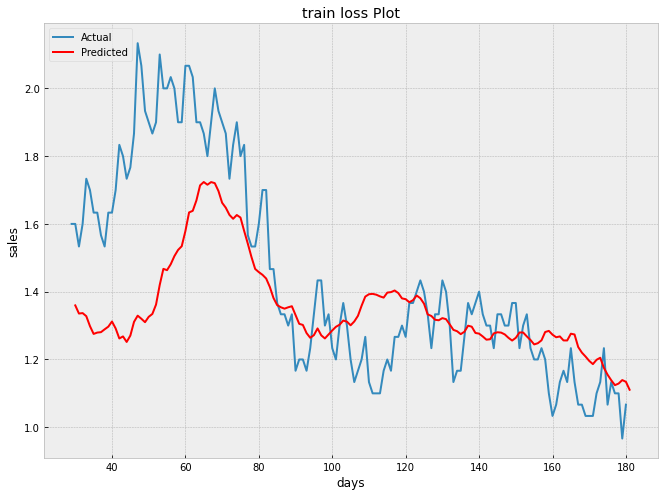

In [416]:
#ploting the actual sales vs predivted sales of 28th product
import matplotlib.pylab as plt
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.xlabel('days')
plt.ylabel('sales')
ax1.plot(sixm.iloc[-152:,1], label="Actual")
ax1.plot(yma.iloc[-152:,1],color='red',label="Predicted")
ax1.legend(loc='upper left')
ax1.title.set_text('train loss Plot')

In [434]:
sixm = copy_concat.iloc[26,:].to_frame()
sixm['MA'] = sixm.rolling(30).mean()
yma = submission_eval.T.iloc[26,:].to_frame()
yma['MA'] = yma.rolling(30).mean()
#sixm

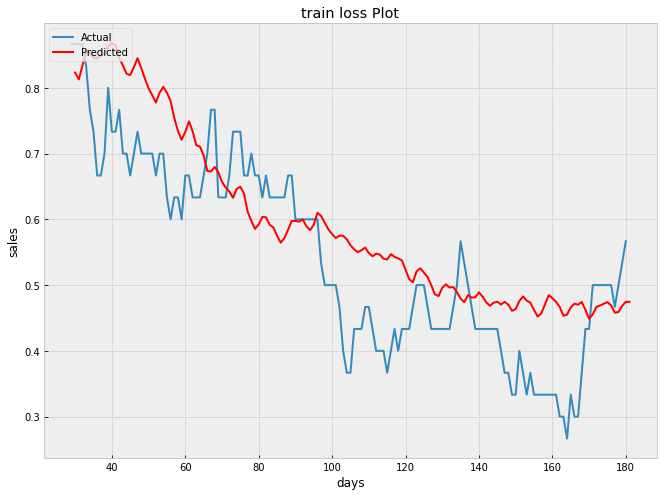

In [435]:
#ploting the actual sales vs predivted sales of 26th product
import matplotlib.pylab as plt
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.xlabel('days')
plt.ylabel('sales')
ax1.plot(sixm.iloc[-152:,1], label="Actual")
ax1.plot(yma.iloc[-152:,1],color='red',label="Predicted")
ax1.legend(loc='upper left')
ax1.title.set_text('train loss Plot')

### Improvements

* Add more features for improving predictions. Through feature engineering we could embed season, quarter, month start/end, day of the week and week of the month. 
* Moving standard deviation could also be explored.


###  References
* Livieris, Ioannis E., Emmanuel Pintelas, and Panagiotis Pintelas. "A CNN–LSTM model for gold price time-series forecasting." Neural computing and applications 32.23 (2020): 17351-17360.
* Lu, Wenjie, et al. "A CNN-LSTM-based model to forecast stock prices." Complexity 2020 (2020).
* Qin, Yao, et al. "A dual-stage attention-based recurrent neural network for time series prediction." arXiv preprint arXiv:1704.02971 (2017).
* Ensafi, Yasaman, et al. "Time-series forecasting of seasonal items sales using machine learning–A comparative analysis." International Journal of Information Management Data Insights 2.1 (2022): 100058

### Credits
* The CNN Model arechitecture was reffred form this link: https://www.kaggle.com/zachary3141/m5-beginner-eda-cnn 
